# Ecommerce Project (Company analysis)

In [46]:
pip install mysql-connector-python

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


# connecting mysql with python jupyter notebook

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import mysql.connector

db = mysql.connector.connect(host = "localhost",
                            username = "root",
                            password = "password123",
                            database = "ecommerce")

cur = db.cursor()

# MAJOR DATA INSIGHTS

# List of all unique cities where customers are located.

In [48]:
query = """ select distinct customer_city from customers """

cur.execute(query)

data = cur.fetchall()

data 
df = pd.DataFrame(data , columns = ["city"])
df

,city
0,franca
1,sao bernardo do campo
2,sao paulo
3,mogi das cruzes
4,campinas
...,...
4114,siriji
4115,natividade da serra
4116,monte bonito
4117,sao rafael


# count the number of orders placed in 2017.

In [8]:
query = """ select count(order_id) from orders where year(order_purchase_timestamp) = 2017 """

cur.execute(query)

data = cur.fetchall()

print("total orders placed in 2017 are =",data[0][0])

total orders placed in 2017 are = 90202


# Total sales per category 

In [13]:
query = """ select products.product_category  category  , round(sum(payments.payment_value),2)  sales
from products join order_items 
on products.product_id = order_items.product_id
join payments on payments.order_id = order_items.order_id
group by category order by sales desc """

cur.execute(query)

data = cur.fetchall()

df = pd.DataFrame(data , columns = ["Category" , "Sales"])
df

,Category,Sales
0,bed table bath,3425107.34
1,HEALTH BEAUTY,3314746.24
2,computer accessories,3170660.89
3,Furniture Decoration,2860352.78
4,Watches present,2858433.36
...,...,...
69,PC Gamer,4348.86
70,House Comfort 2,3421.08
71,cds music dvds,2398.86
72,Fashion Children's Clothing,1571.34


In [14]:
ddf = df.head()
ddf

,Category,Sales
0,bed table bath,3425107.34
1,HEALTH BEAUTY,3314746.24
2,computer accessories,3170660.89
3,Furniture Decoration,2860352.78
4,Watches present,2858433.36


Text(0.5, 1.0, 'top selling categories')

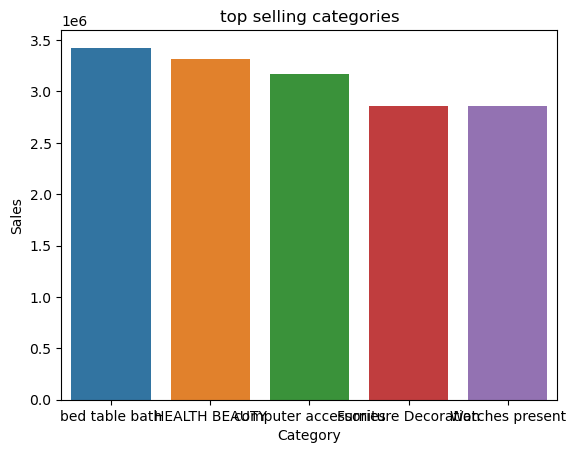

In [26]:
sns.barplot(x = "Category" , y = "Sales" , data = ddf)
plt.title("top selling categories")

# calculate the number of orders that were paid in installments

In [23]:
query = """ select (sum(case when payment_installments > 1 then 1 
else 0 end))/count(*)*100 from payments """

cur.execute(query)

data = cur.fetchall()

"the percentage of orders that were paid in more then 1 installment is " , data[0][0]

('the percentage of orders that were paid in more then 1 installment is ',
 Decimal('49.4176'))

# number of customers from each state

In [47]:
query = """ select count(customer_id) as count , customer_state as state from customers group by customer_state order by count desc """ 

cur.execute(query)

data = cur.fetchall()

data

df = pd.DataFrame(data , columns = ["customer_count" , "state" ])
df



,customer_count,state
0,83492,SP
1,25704,RJ
2,23270,MG
3,10932,RS
4,10090,PR
5,7274,SC
6,6760,BA
7,4280,DF
8,4066,ES
9,4040,GO


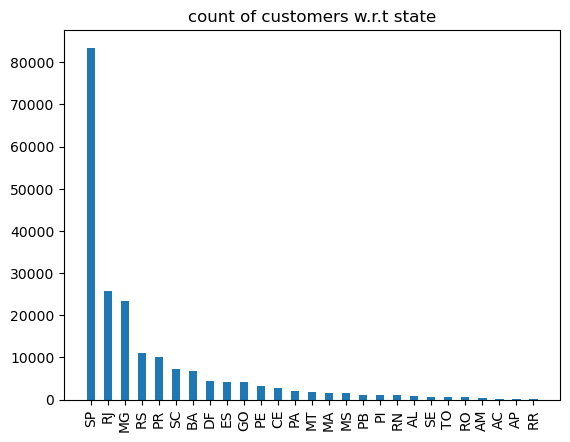

In [54]:
plt.bar(df["state"] , df["customer_count"] , width = 0.5 )

plt.xticks(rotation = 90)
plt.title("count of customers w.r.t state")
plt.show()

# calculate the numbers of orders per month in 2018

In [60]:
query = """ select monthname(order_purchase_timestamp) months , count(order_id) order_count from orders where year (order_purchase_timestamp) = 2018
group by months order by months asc """

cur.execute(query)

data = cur.fetchall()

data 

df = pd.DataFrame(data , columns = ["months","order_count"])
df

,months,order_count
0,April,13878
1,August,13024
2,February,13456
3,January,14538
4,July,12584
5,June,12334
6,March,14422
7,May,13746
8,October,8
9,September,32


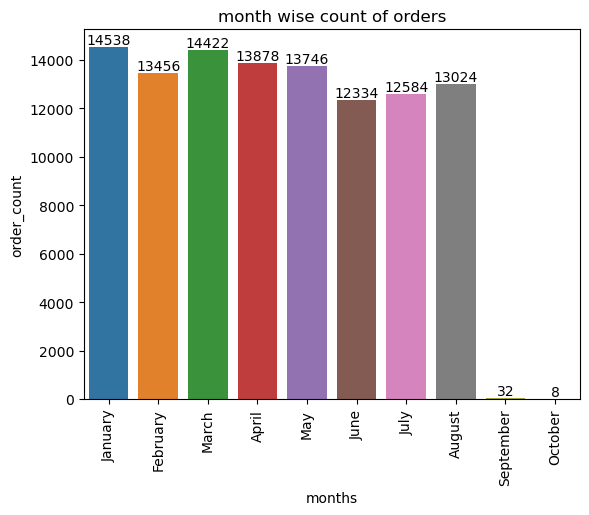

In [65]:
o = ["January" , "February" , "March" , "April" , "May" , "June" , "July" , "August" , "September" , "October"]
ax = sns.barplot( x = "months" , y = "order_count" , data = df ,  order = o)
ax.bar_label(ax.containers[0])
plt.title("month wise count of orders")
plt.xticks(rotation = 90)
plt.show()

# The average number of products per order , grouped by customer city

In [8]:
query = """  with count_per_order as (select orders.order_id , orders.customer_id , count(order_items.order_id) as oc from 
 orders join order_items on orders.order_id = order_items.order_id group by orders.order_id , orders.customer_id)
 
 select customers.customer_city , round(avg(count_per_order.oc),2) avg_products from customers 
 join count_per_order on customers.customer_id = count_per_order.customer_id
 group by customers.customer_city order by avg_products desc ; """

cur.execute(query)

data = cur.fetchall()

df = pd.DataFrame(data , columns = ["city" , "avg products per order"] )
df

,city,avg products per order
0,padre carvalho,14.00
1,celso ramos,13.00
2,datas,12.00
3,candido godoi,12.00
4,matias olimpio,10.00
...,...,...
4105,tuiuti,2.00
4106,tibau do sul,2.00
4107,sao mamede,2.00
4108,sambaiba,2.00


# percentage of total revenue contributed by ech product category

In [13]:
query = """ select products.product_category category , round((sum(payments.payment_value)/(select sum(payment_value) from payments))*100,2) sales_percent from 
products join order_items on products.product_id = order_items.product_id 
join payments on payments.order_id = order_items.order_id 
group by category order by sales_percent desc; """

cur.execute(query)

data = cur.fetchall()

df = pd.DataFrame(data , columns = ["category" , "percentage revenue"])
df

,category,percentage revenue
0,bed table bath,21.40
1,HEALTH BEAUTY,20.71
2,computer accessories,19.81
3,Furniture Decoration,17.87
4,Watches present,17.86
...,...,...
69,PC Gamer,0.03
70,House Comfort 2,0.02
71,cds music dvds,0.01
72,Fashion Children's Clothing,0.01


# Identfying corelation between product price and number of times a product has been purchased

In [23]:
query = """select products.product_category , count(order_items.product_id) , round(avg(order_items.price),2)
from products join order_items on 
products.product_id = order_items.product_id
group by products.product_category; """

cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data , columns = ["category" , "order_count" , "avg_price"])
df


,category,order_count,avg_price
0,HEALTH BEAUTY,19340,130.16
1,sport leisure,17282,114.34
2,Cool Stuff,7592,167.36
3,computer accessories,15654,116.51
4,Watches present,11982,201.14
...,...,...,...
69,flowers,66,33.64
70,Kitchen portable and food coach,30,264.57
71,CITTE AND UPHACK FURNITURE,76,114.95
72,House Comfort 2,60,25.34


In [25]:
arr1 = df["order_count"]
arr2 = df["avg_price"]

a = np.corrcoef([arr1,arr2])
print("corelation between product price and number of times a product has been purchased is",a[0][1])

corelation between product price and number of times a product has been purchased is -0.10631514167157562


# calculate the total revenue generated by each seller and rank them based on their revenue

In [41]:
query = """select * , dense_rank() over(order by revenue desc) as rn from 
(select order_items.seller_id  , round(sum(payments.payment_value),2) as revenue from order_items join
payments on order_items.order_id = payments.order_id group by order_items.seller_id) as a """ 

cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data , columns = ["seller_id" , "revenue" , "rank" ])
df = df.head(7)
df



,seller_id,revenue,rank
0,7c67e1448b00f6e969d365cea6b010ab,507166.91,1
1,1025f0e2d44d7041d6cf58b6550e0bfa,308222.04,2
2,4a3ca9315b744ce9f8e9374361493884,301245.27,3
3,1f50f920176fa81dab994f9023523100,290253.42,4
4,53243585a1d6dc2643021fd1853d8905,284903.08,5
5,da8622b14eb17ae2831f4ac5b9dab84a,272219.32,6
6,4869f7a5dfa277a7dca6462dcf3b52b2,264166.12,7


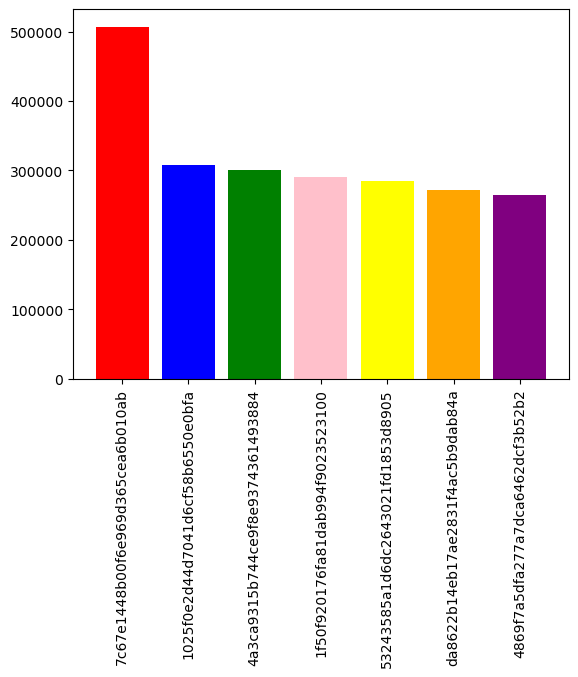

In [42]:
c = ["red" , "blue" , "green" , "pink" , "yellow" , "orange" ,"purple" ]
plt.bar(df["seller_id"] ,  df["revenue"] ,  color = c)

plt.xticks(rotation = 90)
plt.show()

# calcu;ate the moving average of order value for each customer over their order history;


In [3]:
query = """ select distinct customer_id , order_purchase_timestamp , payment , avg(payment)
over(partition by customer_id order by order_purchase_timestamp rows between 2 preceding and current row) as mov_avg 
from
(select orders.customer_id , orders.order_purchase_timestamp , payments.payment_value as payment from payments join orders on
orders.order_id = payments.order_id) as a """

cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data , columns = ["customer_id" , "order_purchase_timestamp" , "payment" , "moving_average"])
df

,customer_id,order_purchase_timestamp,payment,moving_average
0,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.739998
1,000161a058600d5901f007fab4c27140,2017-07-16 09:40:32,67.41,67.410004
2,0001fd6190edaaf884bcaf3d49edf079,2017-02-28 11:06:43,195.42,195.419998
3,0002414f95344307404f0ace7a26f1d5,2017-08-16 13:09:20,179.35,179.350006
4,000379cdec625522490c315e70c7a9fb,2018-04-02 13:42:17,107.01,107.010002
...,...,...,...,...
109950,fffecc9f79fd8c764f843e9951b11341,2018-03-29 16:59:26,0.64,27.120001
109951,fffeda5b6d849fbd39689bb92087f431,2018-05-22 13:36:02,63.13,63.130001
109952,ffff42319e9b2d713724ae527742af25,2018-06-13 16:57:05,214.13,214.130005
109953,ffffa3172527f765de70084a7e53aae8,2017-09-02 11:53:32,45.50,45.500000


# calculate cumulative sales per month for each year

In [9]:
query = """ select years , months, payment , sum(payment) over(order by years,months) as cumulative_sales from
(select year(orders.order_purchase_timestamp) as years , month(orders.order_purchase_timestamp) as months ,
round(sum(payments.payment_value),2) as payment from orders join payments on orders.order_id = payments.order_id 
group by years , months order by years , months) as a; """

cur.execute(query)
data = cur.fetchall()

df = pd.DataFrame(data , columns = ["years" , "month_value" , "sales" , "cumulative_sales"])
df

,years,month_value,sales,cumulative_sales
0,2016,9,504.48,504.48
1,2016,10,118180.96,118685.44
2,2016,12,39.24,118724.68
3,2017,1,276976.08,395700.76
4,2017,2,583816.02,979516.78
5,2017,3,899727.20,1879243.98
6,2017,4,835576.06,2714820.04
7,2017,5,1185837.64,3900657.68
8,2017,6,1022552.76,4923210.44
9,2017,7,1184765.84,6107976.28


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


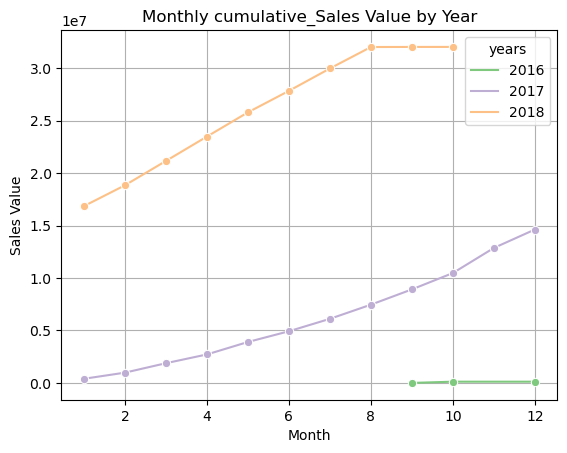

In [20]:
sns.lineplot(data=df, x='month_value', y='cumulative_sales', hue='years', marker='o' , palette = "Accent")

plt.title('Monthly cumulative_Sales Value by Year')
plt.xlabel('Month')
plt.ylabel('Sales Value')
plt.grid(True)
plt.show()

# calculate the year over year growth rate of total sales

In [21]:
query = """with a as(select year(orders.order_purchase_timestamp) as years , round(sum(payments.payment_value),2) as payment from orders join payments on
orders.order_id = payments.order_id group by years order by years )

select years , payment ,   round((((payment -  lag(payment , 1) over(order by years))/ lag(payment , 1) over(order by years))*100),2)
as growth_rate from a; """

cur.execute(query)
data = cur.fetchall()

df = pd.DataFrame(data , columns = ["years" , "yearly sales" , "growth percentage"])
df

,years,yearly sales,growth percentage
0,2016,118724.68,NaN
1,2017,14499493.46,12112.7
2,2018,17399526.10,20.0


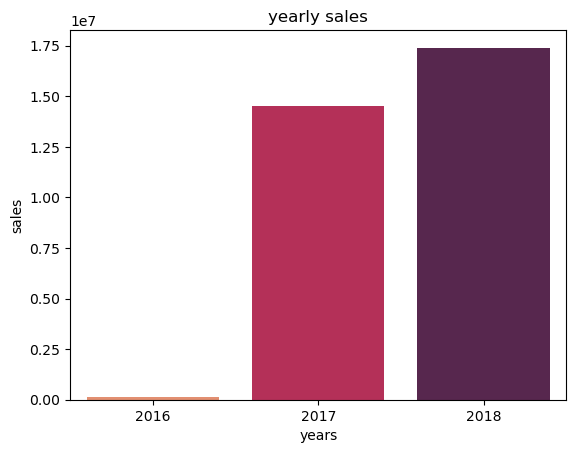

In [29]:
sns.barplot(x = "years" , y = "yearly sales" , data = df , palette = "rocket_r" )
plt.title('yearly sales')
plt.xlabel('years')
plt.ylabel('sales')
plt.show()


# Identify the top 3 customers who spent the most money in each year

In [34]:
query = """select years, customer_id, payment, d_rank
from
(select year(orders.order_purchase_timestamp) years,
orders.customer_id,
sum(payments.payment_value) payment,
dense_rank() over(partition by year(orders.order_purchase_timestamp)
order by sum(payments.payment_value) desc) d_rank
from orders join payments 
on payments.order_id = orders.order_id
group by year(orders.order_purchase_timestamp),
orders.customer_id) as a
where d_rank <= 3 ;"""

cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns = ["years","id","payment","rank"])
df

,years,id,payment,rank
0,2016,a9dc96b027d1252bbac0a9b72d837fc6,2847.100098,1
1,2016,1d34ed25963d5aae4cf3d7f3a4cda173,2801.479980,2
2,2016,4a06381959b6670756de02e07b83815f,2455.560059,3
3,2017,1617b1357756262bfa56ab541c47bc16,27328.160156,1
4,2017,c6e2731c5b391845f6800c97401a43a9,13858.620117,2
5,2017,3fd6777bbce08a352fddd04e4a7cc8f6,13453.320312,3
6,2018,ec5b2ba62e574342386871631fafd3fc,14549.759766,1
7,2018,f48d464a0baaea338cb25f816991ab1f,13844.419922,2
8,2018,e0a2412720e9ea4f26c1ac985f6a7358,9618.879883,3
